In [2]:
# 📦 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score,
    precision_score, recall_score
)

# 🗂 Step 2: Ensure output folder exists
os.makedirs("../output", exist_ok=True)

# 📊 Step 3: Load dataset
df = pd.read_csv("../Data/data.csv")
df.head()  # Optional: view first 5 rows


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# ✅ Step 4: Split Features and Target
X = df.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)
y = df['diagnosis']


In [6]:
# Convert diagnosis: M = 1 (Malignant), B = 0 (Benign)
y = y.map({'M': 1, 'B': 0})


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

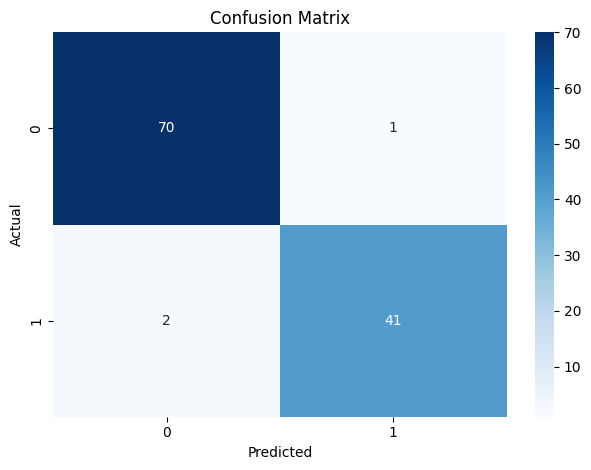

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [9]:
# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("../output/confusion_matrix.png")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Save report
with open("../output/evaluation_metrics.txt", "w") as f:
    f.write("Classification Report:\n")
    f.write(report)


In [10]:
# Get predicted probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Precision: 0.98
Recall: 0.95
ROC AUC: 1.00


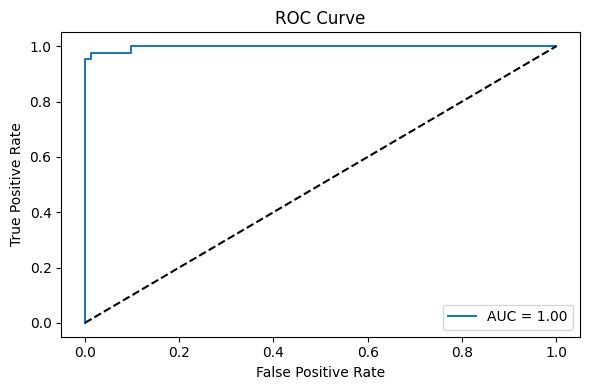

In [11]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.savefig("../output/roc_curve.png")
plt.show()

In [12]:
# Interpret model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coefficients)

# Save to file
coefficients.to_csv("../output/coefficients.csv", index=False)


                    Feature  Coefficient
21            texture_worst     1.350606
10                radius_se     1.268178
28           symmetry_worst     1.208200
7       concave points_mean     1.119804
26          concavity_worst     0.943053
13                  area_se     0.907186
20             radius_worst     0.879840
23               area_worst     0.841846
6            concavity_mean     0.801458
27     concave points_worst     0.778217
15           compactness_se    -0.682491
19     fractal_dimension_se    -0.616230
12             perimeter_se     0.610583
22          perimeter_worst     0.589453
24         smoothness_worst     0.544170
5          compactness_mean    -0.540164
18              symmetry_se    -0.500425
3                 area_mean     0.465210
0               radius_mean     0.431904
2            perimeter_mean     0.393432
1              texture_mean     0.387326
14            smoothness_se     0.313307
17        concave points_se     0.311300
8             sy

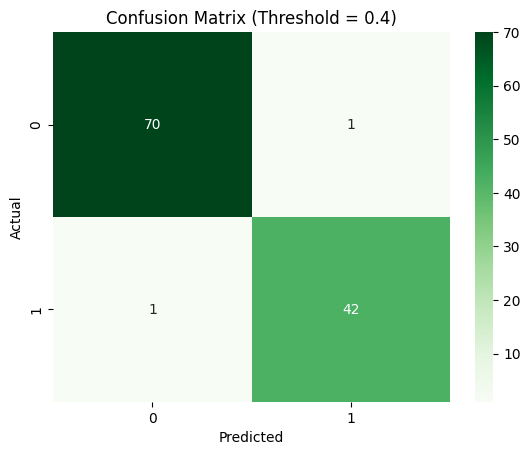

In [13]:
# Custom threshold
threshold = 0.4  # Try adjusting this between 0.3 to 0.7
y_custom_pred = (model.predict_proba(X_test)[:, 1] >= threshold).astype(int)

# New confusion matrix with custom threshold
cm_custom = confusion_matrix(y_test, y_custom_pred)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Greens')
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


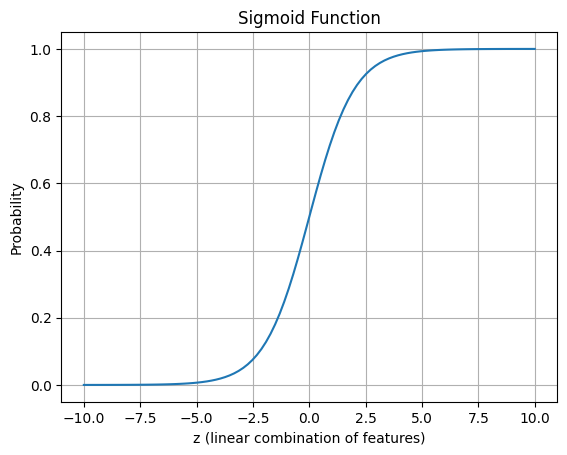

In [14]:
# Visualize sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

plt.plot(z, sig)
plt.title("Sigmoid Function")
plt.xlabel("z (linear combination of features)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()
